## Mateusz Sikora - algorytmy ewolucyjne - projekt - cz. 2

Jak duże $n$ można zadać, by program liczył się w 10 min.? Zbadaj zależność czasu wykonywania od $n$.

In [1]:
import ortools
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import math
import sys
sys.path.append('Users\sikor\Documents\Projekt\lib_test')
#import test.func
#import test.draw
#import numpy as np
#import random
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#import string 
#import time
#import statistics as st
#from itertools import permutations
#from itertools import accumulate

In [2]:
from test import *

Invoking __init__.py for test


In [3]:
g=30 #maksymalna ilość powtórzeń w pętli, to może być inna liczba np. 10,20,40
n=500 #początkowa ilość punktów
f=0 #indeks w tablicach aa i bb - aa[f], bb[f]

#tablice potrzebne do stworzenia wykresu:
aa = [n for i in range(n)] #tablica odpowiedzialna za czas liczony w sekundach
bb = [n for i in range(n)] #tablicz odpowiedzialna za ilość punktów

for i in range(g):
    cities=np.array([[random.random(),random.random()] for _ in range(n)])
    y=0
    x=0
    k = [[0] * n for i in range(n)]
    for i in range(n):
        for j in range(n):
            odl=cities[x]-cities[y]
            y=y+1
            odl=np.fabs(odl) #oblicza wartość bezwzględną
            odl=odl*odl
            hh=odl[0]+odl[1]
            hh=math.sqrt(hh) #oblicza pierwiastek
            k[i][j] = hh*1000000
        y=0
        x=x+1

    time0 = time.time()
    dd = [n for i in range(n)]

    def create_data_model():
        data = {}
        data['distance_matrix'] = k
        data['num_vehicles'] = 1
        data['depot'] = 0
        return data
    def print_solution(manager, routing, solution):
        """Prints solution on console."""
        #print('Objective: {} miles'.format(solution.ObjectiveValue()/1000000))
        index = routing.Start(0)
        plan_output = 'Route for vehicle 0:\n'
        route_distance = 0
        while not routing.IsEnd(index):
            for i in range(n):
                plan_output += ' {} ->'.format(manager.IndexToNode(index))
                previous_index = index
                index = solution.Value(routing.NextVar(index))
                dd[i]=index
                route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        #print(plan_output)
        plan_output += 'Route distance: {}miles\n'.format(route_distance)

    def main():
        """Entry point of the program."""
        # Instantiate the data problem.
        data = create_data_model()

        manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

        routing = pywrapcp.RoutingModel(manager)

        def distance_callback(from_index, to_index):
            """Returns the distance between the two nodes."""
            from_node = manager.IndexToNode(from_index)
            to_node = manager.IndexToNode(to_index)
            return data['distance_matrix'][from_node][to_node]

        transit_callback_index = routing.RegisterTransitCallback(distance_callback)

        routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

        search_parameters = pywrapcp.DefaultRoutingSearchParameters()
        search_parameters.first_solution_strategy = (
            routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

        solution = routing.SolveWithParameters(search_parameters)
        if solution:
            print_solution(manager, routing, solution)

    main()

    time1 = time.time()
    t1=(round(time1 - time0,1))
    f=f+1
    aa[f]=t1
    print(aa[f])
    bb[f]=n
    print(bb[f])
    if(t1>600):
        sys.exit("przekroczyliśmy limit 10 minut")
    else:
        n=n+500

10.0
500
62.8
1000
98.1
1500
314.2
2000
462.5
2500
554.0
3000
926.7
3500


SystemExit: przekroczyliśmy limit 10 minut

C:\Users\sikor\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


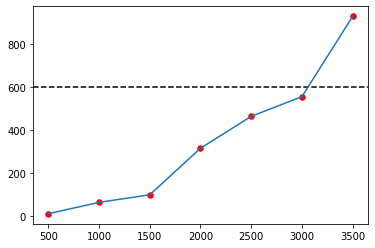

In [4]:
import pylab
plt.axhline(y=600.0, color="black", linestyle="--")
if f==5:
    x=[bb[1], bb[2], bb[3], bb[4], bb[5]]
    y=[aa[1], aa[2], aa[3], aa[4], aa[5]]
if f==6:
    x=[bb[1], bb[2], bb[3], bb[4], bb[5], bb[6]]
    y=[aa[1], aa[2], aa[3], aa[4], aa[5], aa[6]]
if f==7:
    x=[bb[1], bb[2], bb[3], bb[4], bb[5], bb[6], bb[7]]
    y=[aa[1], aa[2], aa[3], aa[4], aa[5], aa[6], aa[7]]
plt.scatter(x,y,c='red', s=30)
pylab.plot(x,y)
pylab.show()

In [5]:
print(dd)
dd[n-1]=0
sequence=np.array(dd)
sequence=np.insert(sequence,0,0)

[2973, 3104, 867, 12, 3051, 1465, 1801, 1199, 1407, 898, 2712, 1461, 2568, 1656, 3206, 314, 3125, 124, 1073, 3018, 1562, 1861, 1895, 1395, 2583, 1356, 1154, 2116, 3293, 1460, 2308, 2526, 1833, 818, 3128, 1499, 3338, 932, 222, 1324, 1519, 2278, 865, 2088, 1082, 390, 2730, 666, 1330, 2993, 2188, 2060, 626, 3107, 304, 2713, 2620, 2058, 354, 1328, 979, 1019, 2475, 1975, 2049, 1536, 3436, 3061, 3097, 3004, 794, 2093, 3241, 2831, 1960, 2167, 807, 2605, 1458, 2884, 1483, 209, 2729, 1908, 280, 35, 2181, 2538, 3227, 1714, 1634, 508, 1093, 1636, 996, 2791, 2588, 1287, 2338, 2573, 791, 2136, 2437, 1267, 2727, 2434, 2638, 2907, 2825, 574, 202, 3050, 2551, 2836, 87, 768, 715, 2484, 2560, 163, 1869, 130, 1900, 1607, 824, 2521, 1211, 992, 2486, 443, 2715, 2652, 265, 490, 318, 1890, 2519, 1047, 2722, 966, 112, 1649, 2378, 56, 678, 1481, 1617, 2343, 453, 2599, 2195, 2433, 889, 2562, 2182, 2785, 2018, 1244, 229, 1399, 2881, 139, 3379, 3016, 2846, 563, 590, 1428, 2878, 1529, 538, 1865, 2646, 1963, 2358, 

In [6]:
tour=np.array([cities[i] for i in sequence])

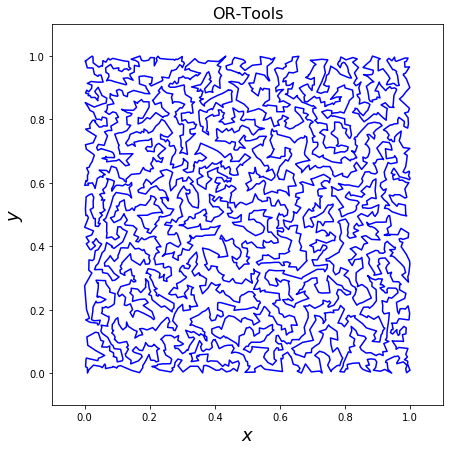

In [7]:
plt.figure(figsize=(7,7))
plt.title("OR-Tools",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

#plt.scatter(cities[:,0],cities[:,1],c='red', s=20)
plt.plot(tour[:,0],tour[:,1],c='blue')
#plt.fill(tour[:,0],tour[:,1],c='blue')

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);